In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOV8

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Exporting Dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="rC3hDvkO3tP9sZI8ZnPA")
project = rf.workspace("armed-uav-detection").project("armed_uav")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.35, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Armed_UAV-1 in yolov8:: 100%|██████████| 1052/1052 [00:00<00:00, 6803.04it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Armed_UAV/data.yaml epochs=30 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Armed_UAV/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


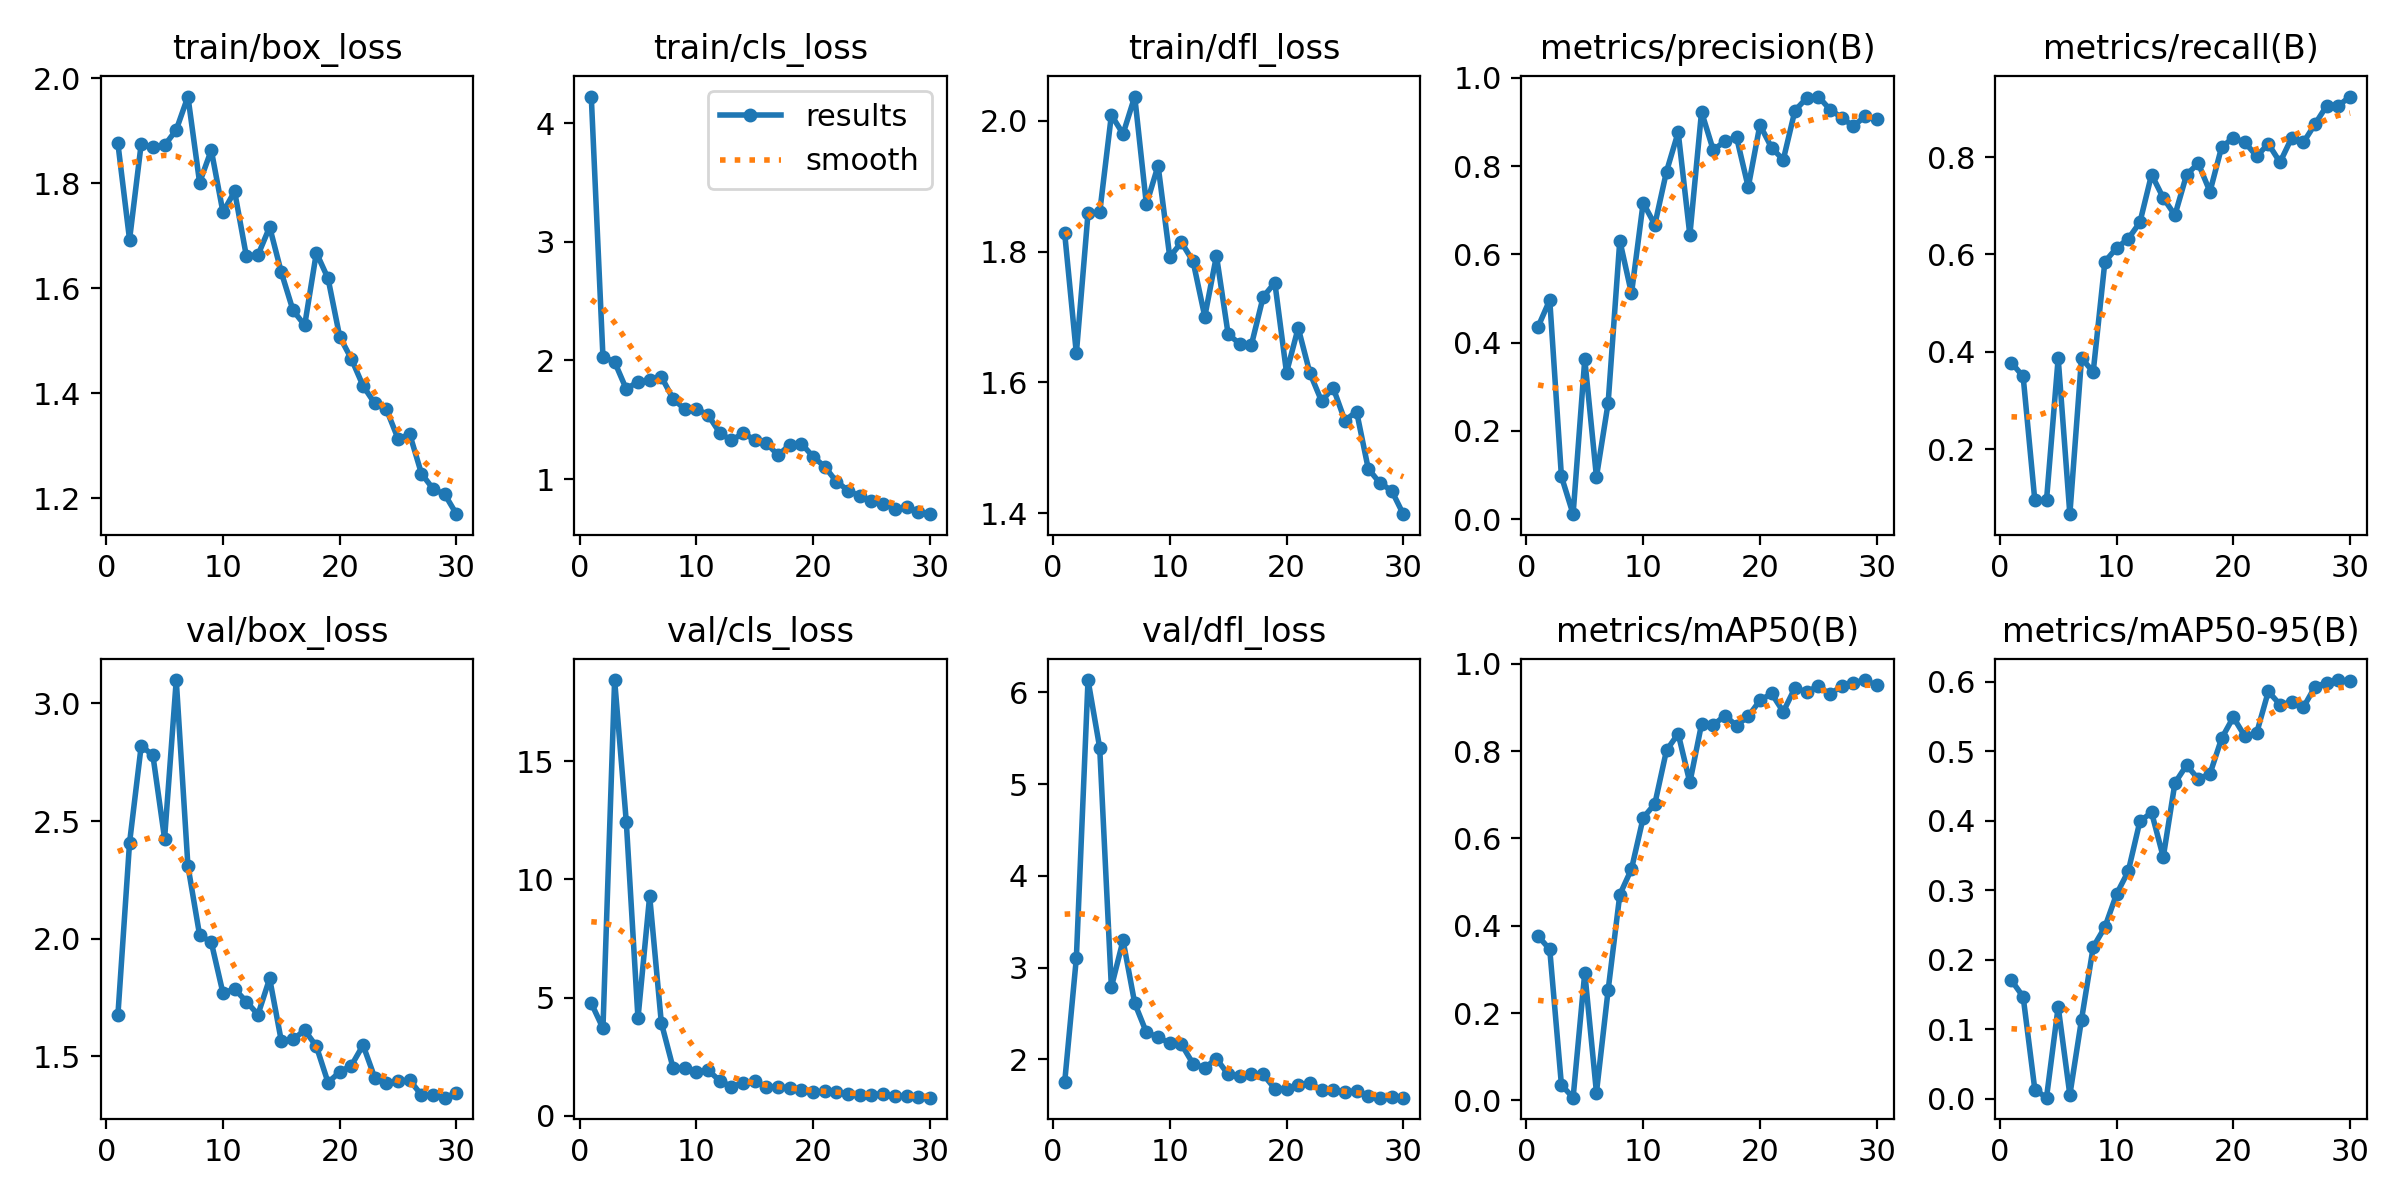

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


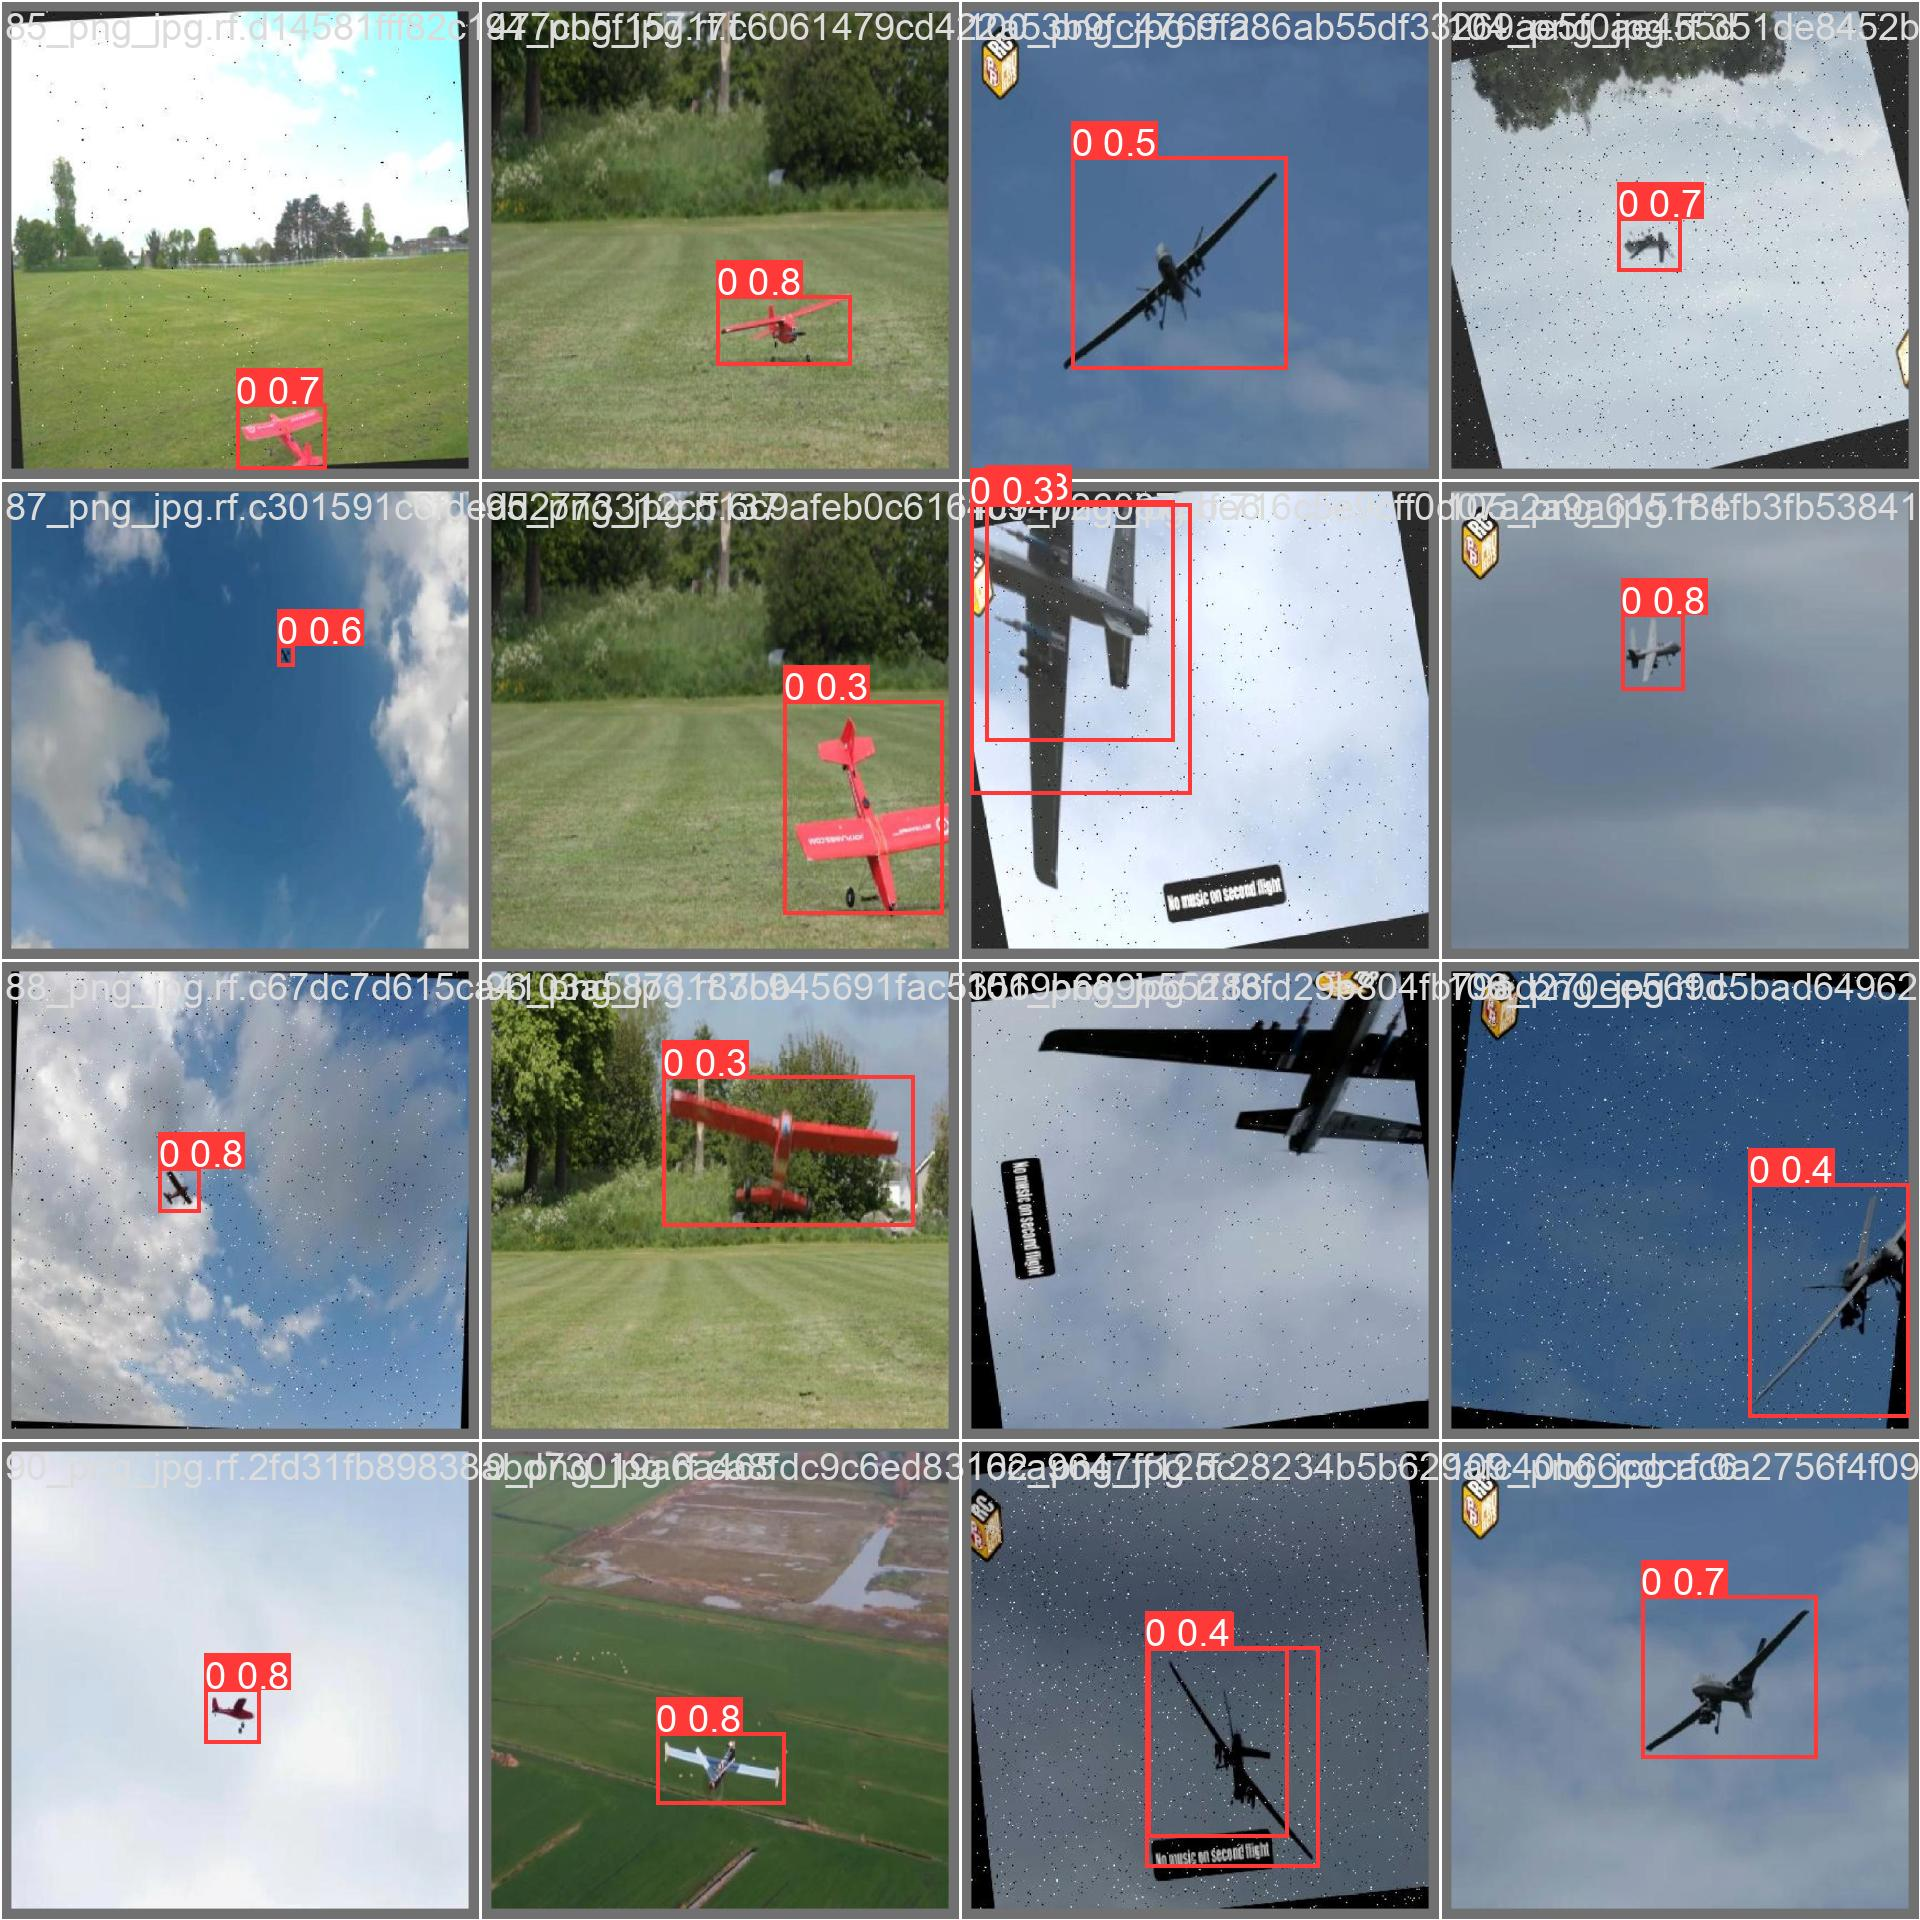

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/datasets/Armed_UAV/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Armed_UAV/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.55it/s]
                   all        104        106      0.913      0.906      0.963      0.605
Speed: 2.4ms preprocess, 15.4ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/Armed_UAV/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/52 /content/datasets/Armed_UAV/test/images/113_png_jpg.rf.b7b88096f64f84215d2ac1869d50dfcf.jpg: 640x640 1 0, 16.3ms
image 2/52 /content/datasets/Armed_UAV/test/images/115_png_jpg.rf.ba4bcac34d8d012c5bb33fc16d774bb3.jpg: 640x640 2 0s, 16.4ms
image 3/52 /content/datasets/Armed_UAV/test/images/118_png_jpg.rf.f08f00356cc822b773e3448c1a67d191.jpg: 640x640 1 0, 16.3ms
image 4/52 /content/datasets/Armed_UAV/test/images/119_png_jpg.rf.078a59b1f6def9ddbe77c9da4fbcc782.jpg: 640x640 1 0, 16.3ms
image 5/52 /content/datasets/Armed_UAV/test/images/119_png_jpg.rf.6ed89ce102c7cc4b112d002bda63106f.jpg: 640x640 1 0, 16.3ms
image 6/52 /content/datasets/Armed_UAV/test/images/119_png_jpg.rf.9d03722eb010489ede92d334f492c6f3.jpg: 640x640 (no detections), 16.3ms
image 7/52 /content/da

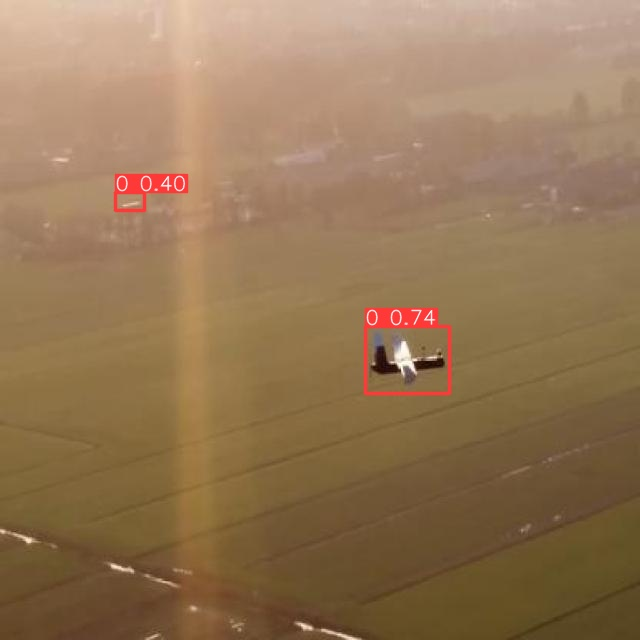

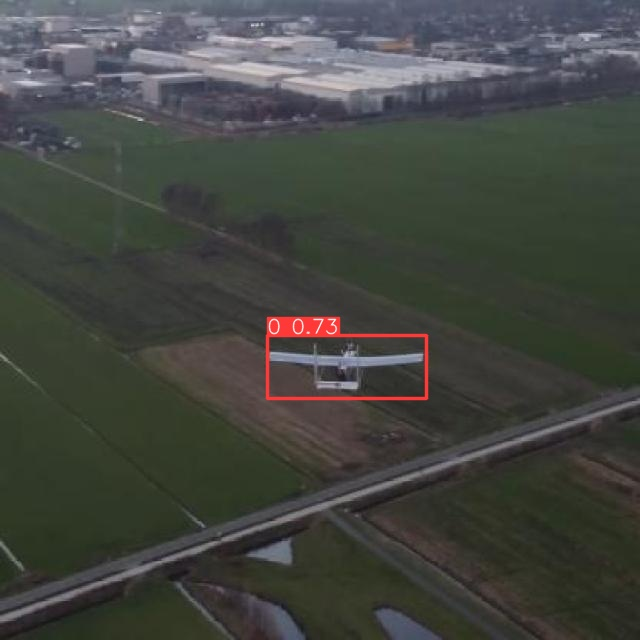

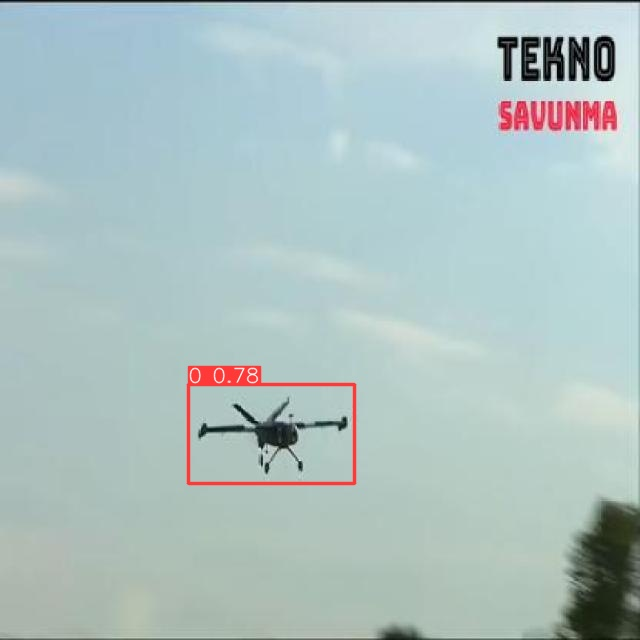

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Sonuçları Kaydedelim

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
import shutil

# Dosyayı taşı
source_path = '/content/yolov8runs'
target_path = '/content/drive/MyDrive/UAV_Detection'
shutil.move(source_path, target_path)


'/content/drive/MyDrive/UAV_Detection/yolov8runs'